In [55]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [56]:
def show_rate(csv_path):
    df = pd.read_csv(csv_path)
    a = np.array(df.iloc[:, 0])
    print(csv_path)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.hist(a,bins=50,range=[0,0.3])
    ax.set_xlabel("pixels_rate")
    plt.show()
    
def show_img(img_path):
    img=cv2.imread(img_path)
    plt.imshow(img)
    

def cal_pix(img_path):
    gray=cv2.imread(img_path)[:,:,0]
    height, width = gray.shape
    num_pixels = np.count_nonzero(gray) / float(height * width)
    return num_pixels

disc


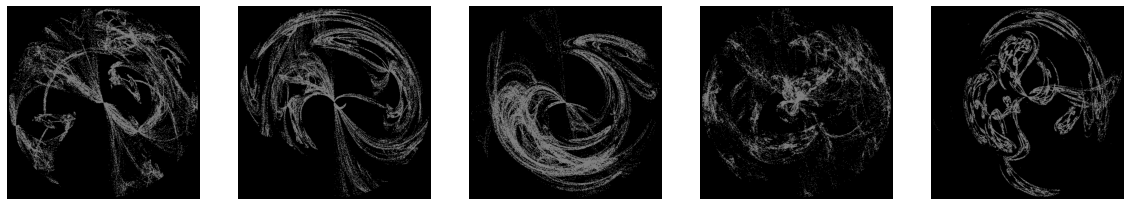

hand_kerchief


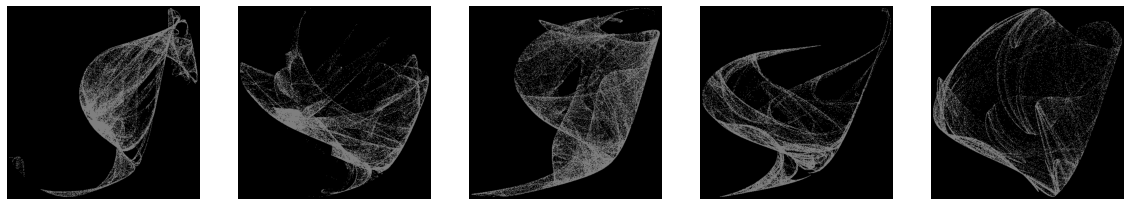

heart


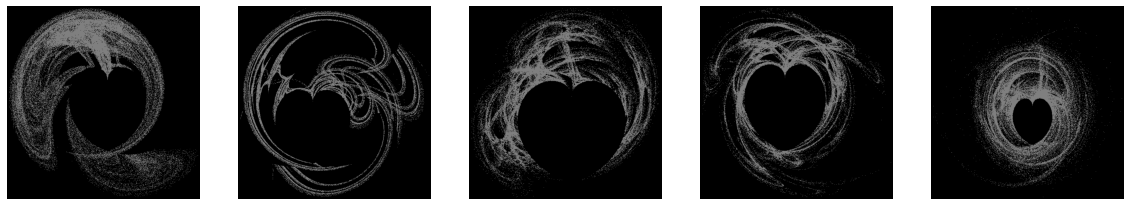

hyperbolic


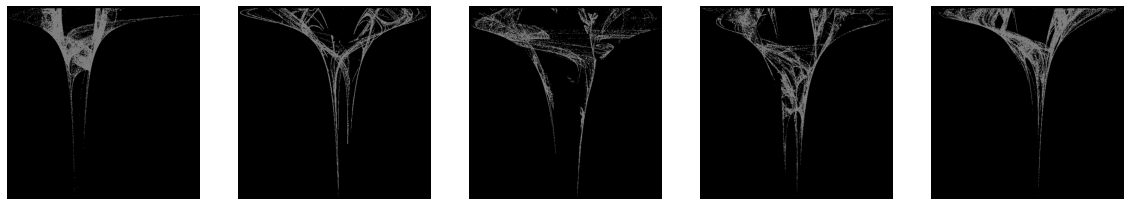

linear


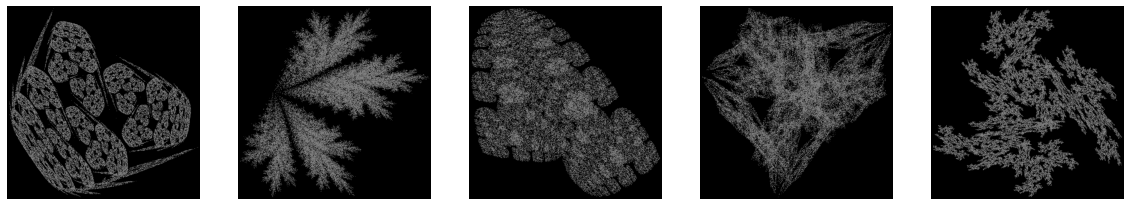

polar


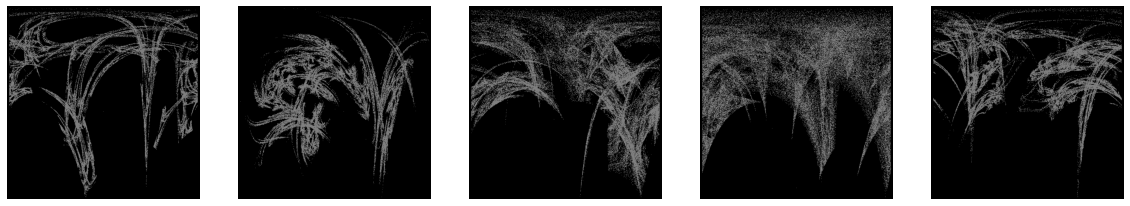

sinusoidal


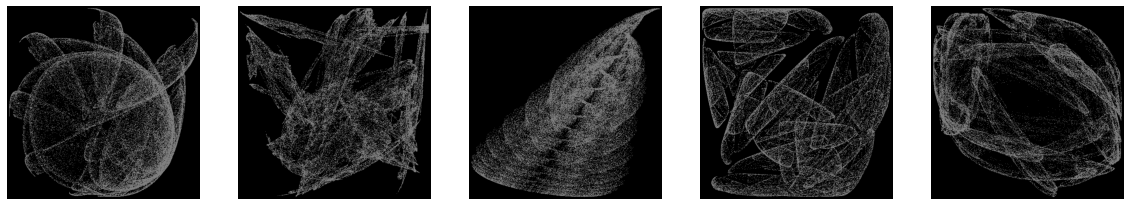

spherical


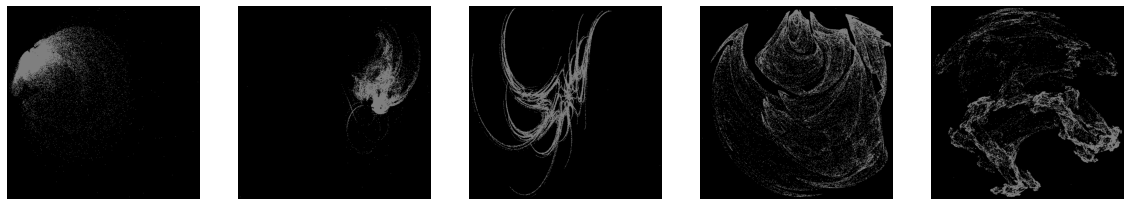

spiral


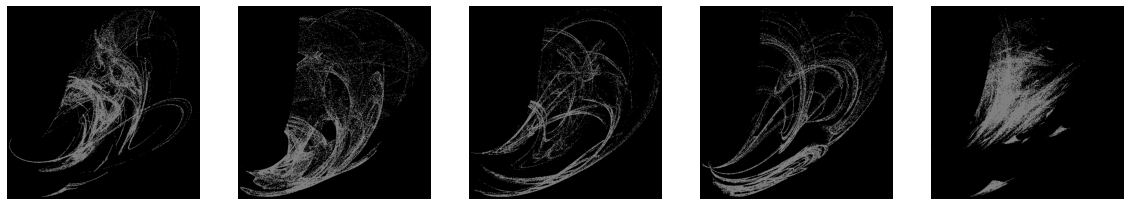

swirl


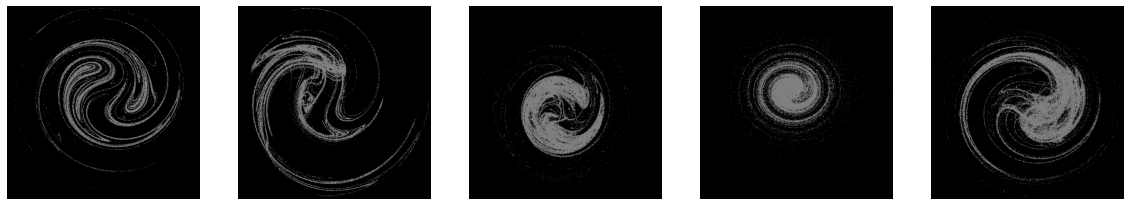

In [57]:
#各バリエーションの画像
for cat in os.scandir("./sample"):
    plt.figure(figsize=(20,20))
    print(cat.name)
    for i,img in enumerate(os.scandir(cat.path),start=1):
        plt.subplot(1,5,i)
        show_img(img.path)
        plt.axis('off')
    plt.show()

# ガウスぼかしの適用  
ガウスぼかしを適用した画像が以下の通り

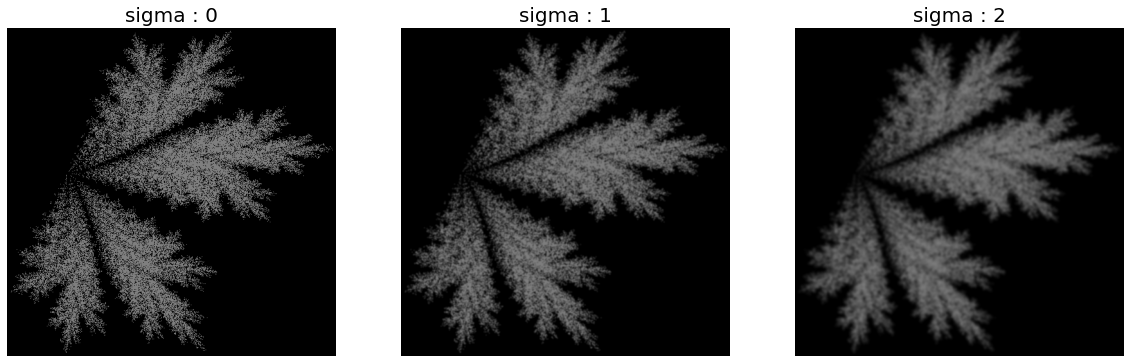

In [58]:
from scipy.ndimage import gaussian_filter

img_path="./sample/linear/00067.png"
plt.figure(figsize=(20,20))
for i,sigma in enumerate([0,1,2],start=1):
    plt.subplot(1,3,i)
    plt.title('sigma : '+str(sigma),fontsize=20)
    img=cv2.imread(img_path)
    img=gaussian_filter(img,sigma)
    plt.imshow(img)
    plt.axis('off')
plt.show()

# 平滑化フィルターの適用

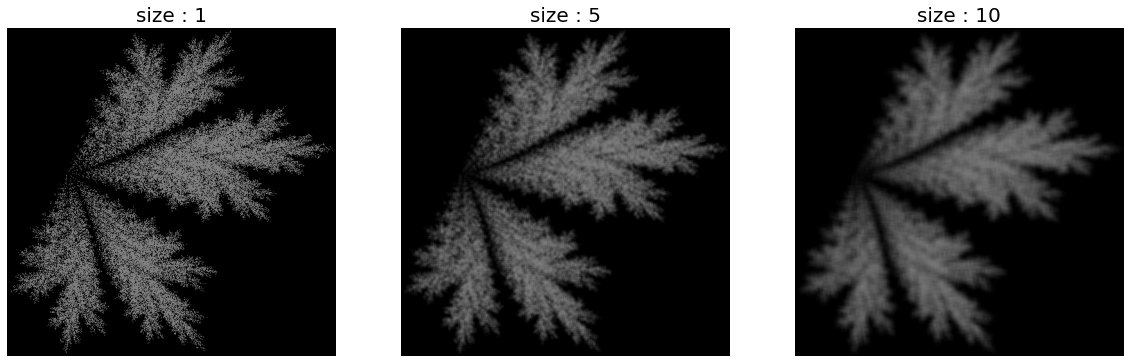

In [59]:
from scipy.ndimage import uniform_filter

img_path="./sample/linear/00067.png"
plt.figure(figsize=(20,20))
for i,size in enumerate([1,5,10],start=1):
    plt.subplot(1,3,i)
    plt.title('size : '+str(size),fontsize=20)
    img=cv2.imread(img_path)
    img=uniform_filter(img,size)
    plt.imshow(img)
    plt.axis('off')
plt.show()

# メディアンフィルタの適用

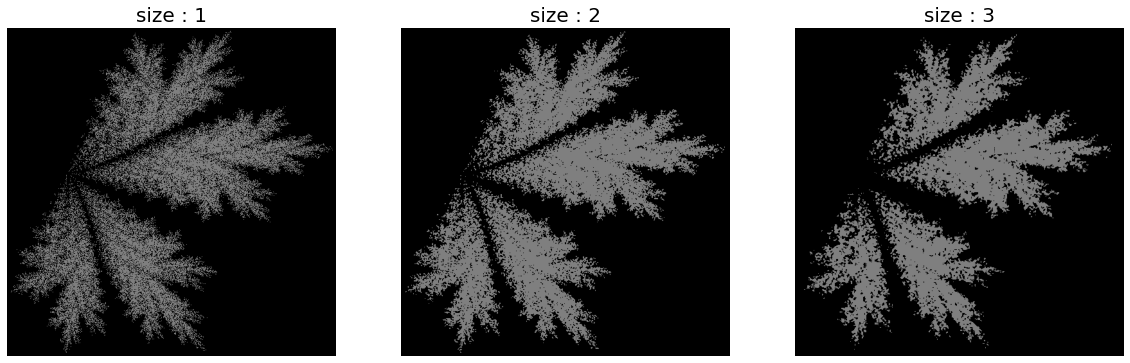

In [60]:
from scipy.ndimage import median_filter

img_path="./sample/linear/00067.png"
plt.figure(figsize=(20,20))
for i,size in enumerate([1,2,3],start=1):
    plt.subplot(1,3,i)
    plt.title('size : '+str(size),fontsize=20)
    img=cv2.imread(img_path)
    img=median_filter(img,size=size)
    plt.imshow(img)
    plt.axis('off')
plt.show()

# pixels_rateについて     
    
       
- pixels_rate=プロットされた点の数/全体のpixel数 
- FractalDBでは0.2以上の画像を採用するよう設定されていた。  
- linearモデルでは0.3以上となる画像はほとんど生成できないらしい。   
- pixels_rateが低いと無駄なスペースが出来てしまい、学習が効率的に行われない可能性がある

disc
pixels_rate : 0.15507888793945312


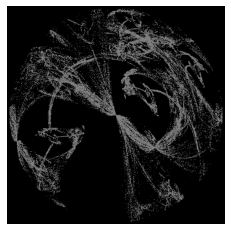

hand_kerchief
pixels_rate : 0.13068389892578125


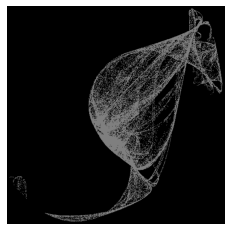

heart
pixels_rate : 0.18944168090820312


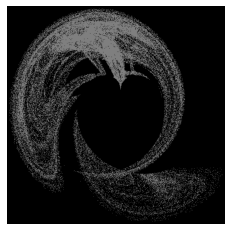

hyperbolic
pixels_rate : 0.0561981201171875


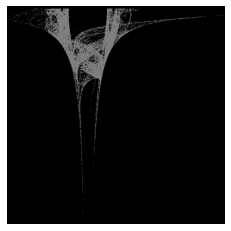

linear
pixels_rate : 0.219451904296875


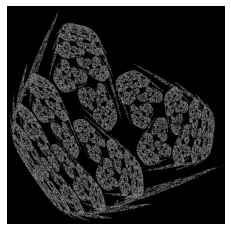

polar
pixels_rate : 0.14252853393554688


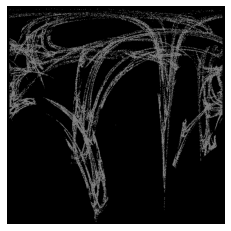

sinusoidal
pixels_rate : 0.2163543701171875


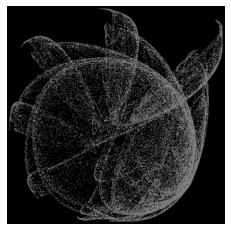

spherical
pixels_rate : 0.05850982666015625


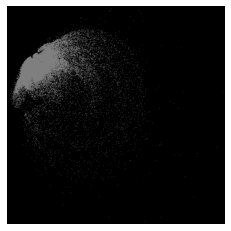

spiral
pixels_rate : 0.1044769287109375


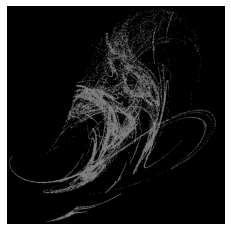

swirl
pixels_rate : 0.08332061767578125


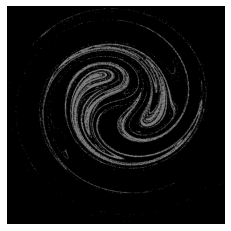

In [61]:
for cat in os.scandir("./sample"):
    print(cat.name)
    for i,img in enumerate(os.scandir(cat.path),start=1):
        print("pixels_rate : "+str(cal_pix(img.path)))
        show_img(img.path)
        plt.axis('off')
        plt.show()
        break

# 各バリエーションでのpixels_rateの取りうる値  
- 1000回画像生成を行い、各バリエーションでのpixels_rateの分布を調べる
- 学習に使えそうな画像候補のpixels_rateが0.1から0.3あたり
- 画像サイズは512*512(サイズによってpixels_rateが変わる可能性がある)

./pixels_csv\disc.csv


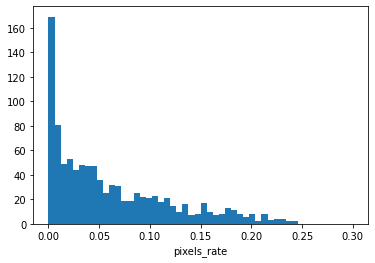

./pixels_csv\hand_kerchief.csv


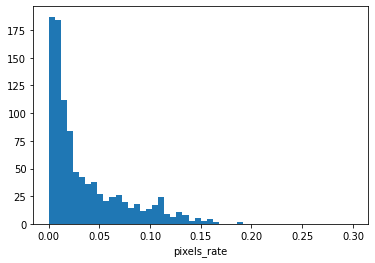

./pixels_csv\heart.csv


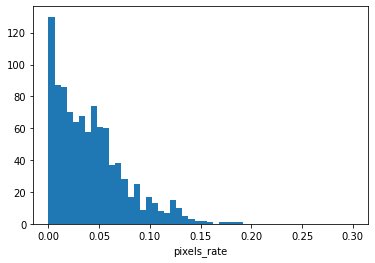

./pixels_csv\hyperbolic.csv


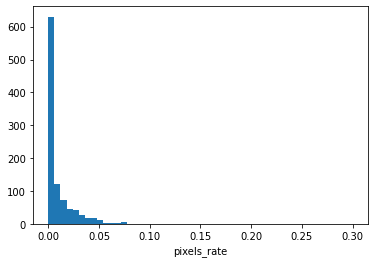

./pixels_csv\linear.csv


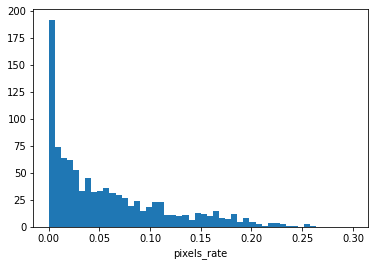

./pixels_csv\polar.csv


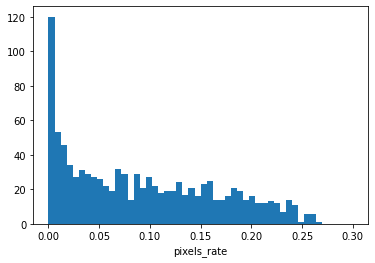

./pixels_csv\sinusoidal.csv


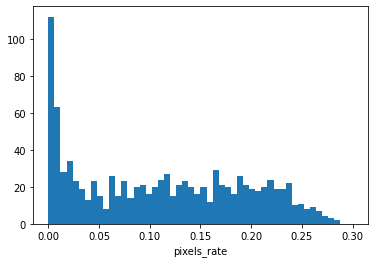

./pixels_csv\spherical.csv


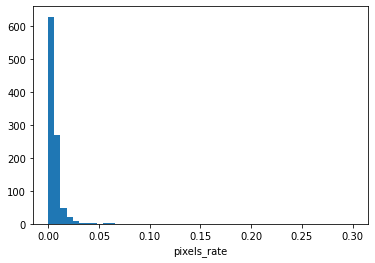

./pixels_csv\spiral.csv


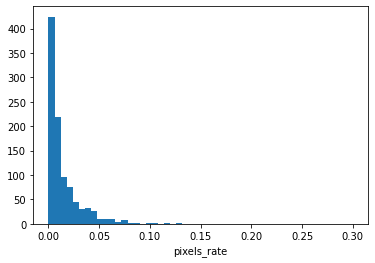

./pixels_csv\swirl.csv


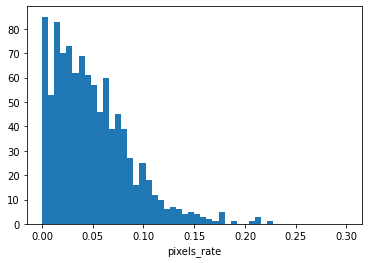

In [62]:
for file in os.scandir("./pixels_csv"):
    show_rate(file.path)

# RSSによる画像類似度の算出
各画像間で残差平方和をとる。値が小さいほど似た構造のフラクタルであるとする。  
厳密ではないが、ある程度フラクタル構造の違いを数値化できる。（要改善）  
ここでは一番似たような画像が数多く生成されていたswirlのフラクタルで検証する。

rss=36894


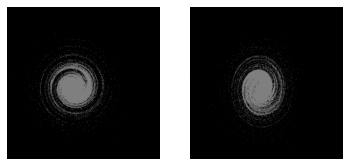

rss=59859


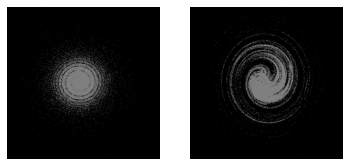

rss=71676


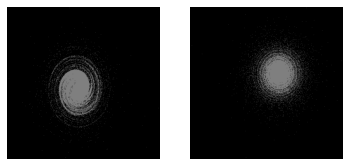

rss=85629


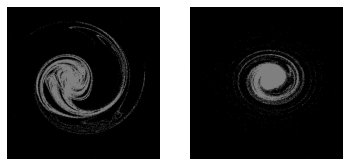

rss=105543


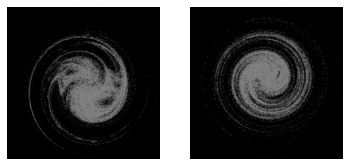

In [63]:
image_path="./fractal_image/swirl"
result=[]
num=50
for i,file1 in enumerate(list(os.scandir(image_path))[:num]):
    for j,file2 in enumerate(list(os.scandir(image_path))[:num]):
        if i>=j:
            continue
        img1=cv2.imread(file1.path)
        img2=cv2.imread(file2.path)
        rss=np.sum((img1-img2)**2)
        result.append({"img1":file1.path,"img2":file2.path,"rss":rss})
result=sorted(result,key=lambda x:x['rss'])
show_num=5
for a in result[::int((num*num/2)/show_num)]:
    print("rss="+str(a["rss"]))
    img1=cv2.imread(a["img1"])
    img2=cv2.imread(a["img2"])
    plt.subplot(1,2,1)
    plt.axis("off")
    plt.imshow(img1)
    plt.subplot(1,2,2)
    plt.axis("off")
    plt.imshow(img2)
    plt.show()

# 階層的クラスタリングを使ってフラクタル画像を分類する
rssの値をもとにクラスタリングを行う

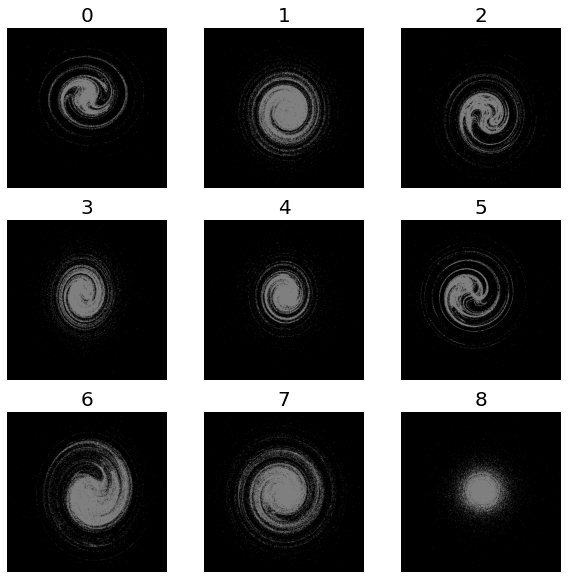

C:\Users\sec20\AppData\Local\Temp/ipykernel_18384/773313172.py:25: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(df, method=method, metric="euclidean")


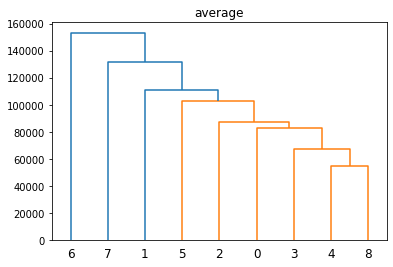

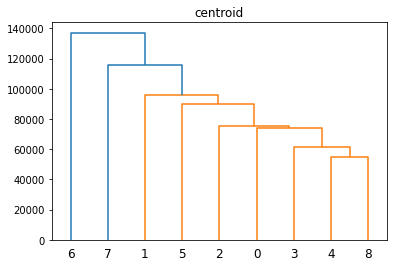

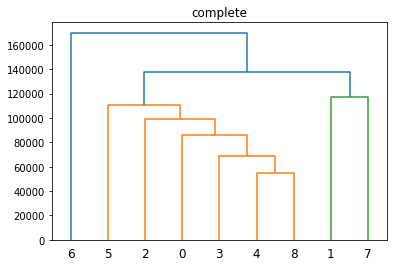

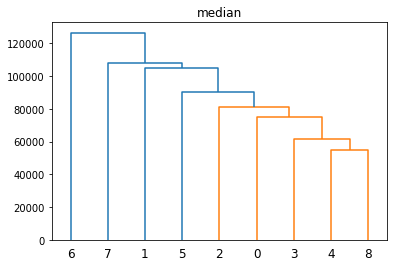

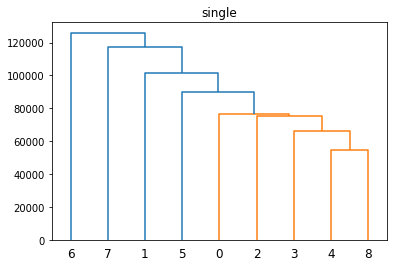

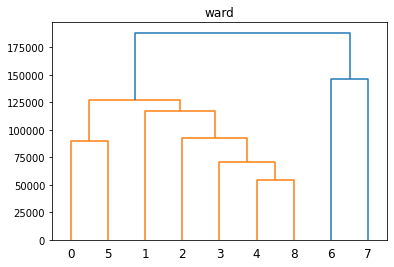

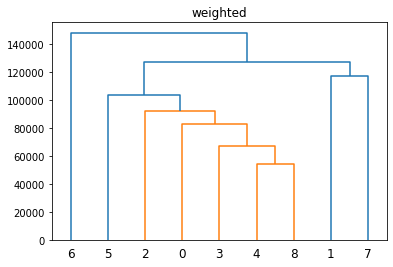

In [64]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

image_path="./fractal_image/swirl"
data=[]
num=3
plt.figure(figsize=(10,10))
image_sample_list=random.sample(list(os.scandir(image_path)),num*num)
for i,file1 in enumerate(image_sample_list,start=1):
    img1=cv2.imread(file1.path)
    d=[]
    plt.subplot(num,num,i)
    plt.title(str(i-1),fontsize=20)
    plt.imshow(img1)
    plt.axis("off")
    for file2 in image_sample_list:
        img2=cv2.imread(file2.path)
        rss=np.sum((img1-img2)**2)
        d.append(rss)
    data.append(d)
plt.show()
df=pd.DataFrame(data)
method_list = ("average", "centroid", "complete", "median", "single", "ward", "weighted")
for method in method_list:
    Z = linkage(df, method=method, metric="euclidean")
    dendrogram(Z)
    plt.title(method)
    plt.show()

In [65]:
a=np.arange(3)
b=np.arange(3)
print(np.sum((a+b)**2))

20
